<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.10.1'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [3]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [6]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,2017,DZA,Algeria,Middle East & North Africa,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,2017,AGO,Angola,Sub-Saharan Africa,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,2017,ARM,Armenia,Caucasus & Central Asia,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,-,10,10,10,10,10,9.29,7,8.18,6,8.73,4
1616,2008,DNK,Denmark,Western Europe,-,10,10,10,10,10,9.49,3,7.98,9,8.73,4
1617,2008,CHE,Switzerland,Western Europe,-,10,10,10,10,10,9.31,6,8.35,4,8.83,3
1618,2008,NZL,New Zealand,Oceania,-,10,10,10,10,10,9.42,4,8.46,3,8.94,2


Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [7]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [8]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
    dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


In [15]:
dataset.dtypes

year                        int64
ISO_code                   object
countries                  object
region                     object
pf_identity_legal         float64
pf_identity_sex_male      float64
pf_identity_sex_female    float64
pf_identity_sex           float64
pf_identity_divorce       float64
pf_identity               float64
pf_score                  float64
pf_rank                   float64
ef_score                  float64
ef_rank                   float64
hf_score                  float64
hf_rank                   float64
dtype: object

# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 
  3. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  4. ¿Tiene sentido calcular la moda?
  5. ¿Cómo pueden sanearse los valores faltantes?
  6. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  

## Respuestas
--------------

#### 1.1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
Para determinar el rango de las variables utilizamos los metodos `min` y `max` que operan sobre las columnas del dataframe y presenta los resultados asociados a los nombres o labels de las columnas.

In [25]:
dataset.min()

year                                         2008
ISO_code                                      AGO
countries                                 Albania
region                    Caucasus & Central Asia
pf_identity_legal                               0
pf_identity_sex_male                            0
pf_identity_sex_female                          0
pf_identity_sex                                 0
pf_identity_divorce                             0
pf_identity                                     0
pf_score                                     2.22
pf_rank                                         1
ef_score                                     2.58
ef_rank                                         1
hf_score                                     3.69
hf_rank                                         1
dtype: object

In [27]:
dataset.max()

year                                2017
ISO_code                             ZWE
countries                       Zimbabwe
region                    Western Europe
pf_identity_legal                     10
pf_identity_sex_male                  10
pf_identity_sex_female                10
pf_identity_sex                       10
pf_identity_divorce                   10
pf_identity                           10
pf_score                            9.56
pf_rank                              162
ef_score                            9.11
ef_rank                              162
hf_score                            9.12
hf_rank                              162
dtype: object

Sin embargo podemos acmodarlos en un dataframe concatenando las resultados de las llamadas a los metodos anteriores. Es necesario destacar que los tipos de datos retornados por `max` y `min` son tipo `Series` de pandas

In [49]:
dataset_ranges = pandas.concat([dataset.min(), dataset.max()], axis=1)
dataset_ranges.columns = ['min','max']
dataset_ranges

,min,max
year,2008,2017
ISO_code,AGO,ZWE
countries,Albania,Zimbabwe
region,Caucasus & Central Asia,Western Europe
pf_identity_legal,0,10
pf_identity_sex_male,0,10
pf_identity_sex_female,0,10
pf_identity_sex,0,10
pf_identity_divorce,0,10
pf_identity,0,10


#### 1.2. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? ¿nos quedamos con un único valor o comparamos todos los valores? ¿usamos el promedio usamos la mediana?

In [70]:
dataset.loc[dataset['countries']=='Argentina',['year','countries','pf_identity','hf_score']]

,year,countries,pf_identity,hf_score
3,2017,Argentina,10.0,6.86
165,2016,Argentina,10.0,6.75
327,2015,Argentina,10.0,6.54
489,2014,Argentina,10.0,6.27
651,2013,Argentina,10.0,6.55
813,2012,Argentina,10.0,6.64
975,2011,Argentina,10.0,6.93
1137,2010,Argentina,10.0,6.96
1299,2009,Argentina,10.0,7.06
1551,2008,Argentina,10.0,7.10


Creo que ambos abordajes son validos dependiendo del tipo de análisis que querramos hacer. Por un lado, si analizamos todos los datos como una secuencia o vector, podemos comparar la diferencia o la relacion año a año de ambas variables. Esto creo que seria mejor visualizado en grafico de barras. Por otro lado, optaria por el promedio. Esto dado que el promedio nos permitiria resumir en un unico valor la influencia de todos los valores que ha asumido la variable a lo largo de los años en este caso. A su vez consideraria el analisis de la desviacion de los datos respecto al promedio (desviacion estandar, error cuadratico medio) para tomar alguna noción del grado de variación que han tenido. No considero apropiada la mediana dado que estariamos tomando en consideracion solo uno o dos valores (cantidad par o impar de muestras, respectivamente) de la secuencia sin pesar la influencia de los restantes.


#### 1.3. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.

A continuación tomo la región sobre la cual quiero operar.

In [ ]:
region_latam_carib = 'Latin America & the Caribbean'

Se calcula media, desviación estándar y mediana de las variables pf_identity y hf_score para la regió de Latinoamérica y el Caribe.

In [81]:
region_latam_carib_means = dataset.loc[dataset['region']==region_latam_carib,['pf_identity','hf_score']].mean()
region_latam_carib_stds = dataset.loc[dataset['region']==region_latam_carib,['pf_identity','hf_score']].std()
region_latam_carib_med = dataset.loc[dataset['region']==region_latam_carib,['pf_identity','hf_score']].median()

region_latam_carib_stats = pandas.concat([region_latam_carib_means, region_latam_carib_stds, region_latam_carib_med], axis=1)
region_latam_carib_stats.columns = ['mean','std','med']
region_latam_carib_stats

,mean,std,med
pf_identity,8.582171,1.875832,10.00
hf_score,7.036977,0.634897,7.02


Se calcula media, desviación estándar y mediana de las variables pf_identity y hf_score para todas las regiones que no son Latinoamérica y el Caribe.

In [82]:
nregion_latam_carib_means = dataset.loc[dataset['region']!=region_latam_carib,['pf_identity','hf_score']].mean()
nregion_latam_carib_stds = dataset.loc[dataset['region']!=region_latam_carib,['pf_identity','hf_score']].std()
nregion_latam_carib_med = dataset.loc[dataset['region']!=region_latam_carib,['pf_identity','hf_score']].median()

nregion_latam_carib_stats = pandas.concat([nregion_latam_carib_means, nregion_latam_carib_stds, nregion_latam_carib_med], axis=1)
nregion_latam_carib_stats.columns = ['mean','std','med']
nregion_latam_carib_stats

,mean,std,med
pf_identity,7.018721,3.323457,8.80
hf_score,6.966388,1.121887,6.83


Creo que puede ser valida la comparacion en términos de media y desviación estandar ya que si observamos estos estadisticos podemos inferir cual es el valor epserado para la region en funcion de los valore obtenidos a lo largo de los años y a su vez podemos ver cuanto se dispersan respecto de este. Es cierto que en este caso la dispersion se ve afectada no solamente en el tiempo sino también por el dominio geografico o goeopolitico. En el caso de la mediana creo que nos brinda una perspectiva imprecisa de los hechos de fondo al considerar solo una pequeña porción de los datos.

#### 1.4. ¿Tiene sentido calcular la moda?

Creo que al igual que en el caso de la mediana es un estadistico que provee una vision acotada del evento subyacente, no tendría sentido. Si bien en alguna circunstancia podria ser de utilidad. La moda solo se focaliza en los datos mas repetidos en la muestra. Por lo tanto estarí perdiendo visibilidad de lo ocurre con el resto de los datos. En otras palabras, grandes variaciones de los datos fuera de la moda no se reflejarían en esta.

#### 1.5. ¿Cómo pueden sanearse los valores faltantes?

Podemos pensar en utilizar interpolacion, extrapolacion e inclusive algún tipo de estimador basado en informacion de contexto. Sin embargo en el caso particular de este dataset, el contexto geopolítico puede presentar discontinuidades o cambios que no son funcion del contexto temporal ni espacial. Por lo tanto lo primeramente mencionado es relativo. 

En algunos casos podriamos pensar en removerlos del análisis.

#### 1.6. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?

En principio no encuentro outliers en los datos observando los histogramas que se encuentran a continuación.

En primera instancia he utilizado un histograma para ver si existen outliers. Pero podria definir de manera empirica un limite basado en la desviacion estandar para etiquetar a los valores por fuera de dicho limite como outliers.

No he podido definir si son glogales o por grupos. Tal vez deba revis [TODO]

La eliminacion o no de los outliers personalmente la dejaria sujeta a la importancia o relevancia que dicho punto pueda tener en el analisis. Si estamos buscando anomalias o casos corner para ser analizados, claramente no deberia ser eliminado pero si quisiesemos, por ejemplo, analizar la tendencia global o regional, podriamos apartarlo para evitar su infliuencia.

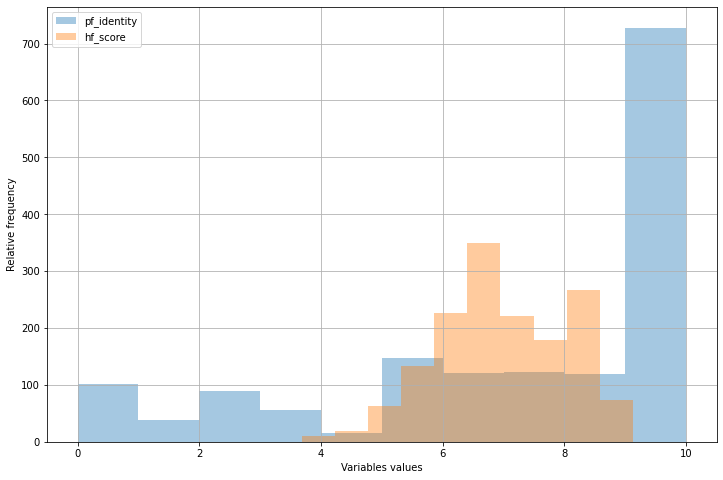

In [258]:
plt.figure(figsize=(12,8))
seaborn.distplot(dataset.pf_identity, kde=False, bins=10, label='pf_identity')
seaborn.distplot(dataset.hf_score, kde=False,bins=10, label='hf_score')
plt.xlabel('Variables values')
plt.ylabel('Relative frequency')
plt.grid(True)
plt.legend()

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?


## Respuestas
--------------

#### 2.1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
Armo un dataframe de pandas tomando solo las columnas `year`, `pf_identity` y `hf_score`, luego lo agrupo por año y computo el valor mediol por año. El reset del index es simplemente para mover year a una columna y sacarlo del index.

In [124]:
means_by_year = dataset[['year','pf_identity', 'hf_score']].groupby('year').mean()
means_by_year.reset_index(inplace=True)
means_by_year

,year,pf_identity,hf_score
0,2008,7.721986,7.078014
1,2009,7.721986,7.083050
2,2010,7.485621,7.035294
3,2011,7.452941,7.014575
4,2012,7.452941,6.978039
5,2013,7.367516,6.970191
6,2014,7.416352,6.949937
7,2015,6.964151,6.922264
8,2016,6.870370,6.892716
9,2017,6.496914,6.887963


En este caso utilizo la funcion plot por que me parecio más facil por como quedaron ordenados los datos.

(array([6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8]),
 <a list of 8 Text major ticklabel objects>)

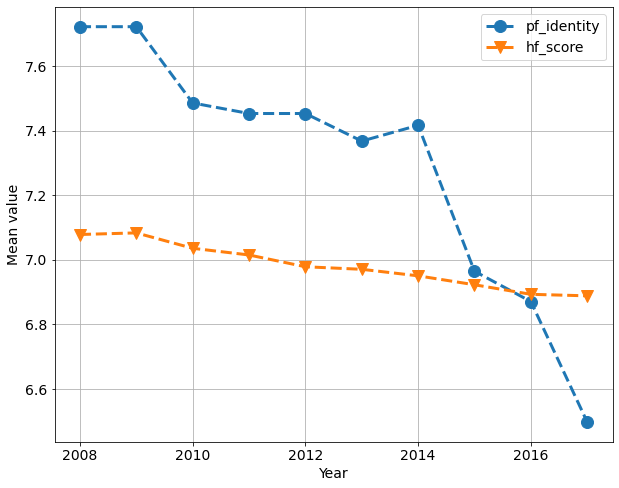

In [172]:
plt.figure(figsize=(10,8))
plt.plot(means_by_year.year, means_by_year.pf_identity, '--o', label='pf_identity',linewidth=3, markersize=12)
plt.plot(means_by_year.year, means_by_year.hf_score,'--v', label='hf_score',linewidth=3, markersize=12)
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('Mean value', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#### 2.2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
Como en el caso anterior, agrupo los datos por region y año, luego se computa el valor medio. En este caso se conctaenan dos operaciones de agrupamiento.

In [232]:
pf_means_by_region_year = dataset[['region','year','pf_identity']].groupby(['region','year']).mean()
pf_means_by_region_year.reset_index(inplace=True)
pf_means_by_region_year

,region,year,pf_identity
0,Caucasus & Central Asia,2008,9.040000
1,Caucasus & Central Asia,2009,9.040000
2,Caucasus & Central Asia,2010,9.000000
3,Caucasus & Central Asia,2011,8.166667
4,Caucasus & Central Asia,2012,8.166667
...,...,...,...
95,Western Europe,2013,9.933333
96,Western Europe,2014,9.933333
97,Western Europe,2015,9.400000
98,Western Europe,2016,9.400000


Utilizo la funcion `pointplot` de seaborn para graficar los datos pero como existen subgrupos segun la region utilizo el parametro `hue=region` para que generar las graficas segun región.

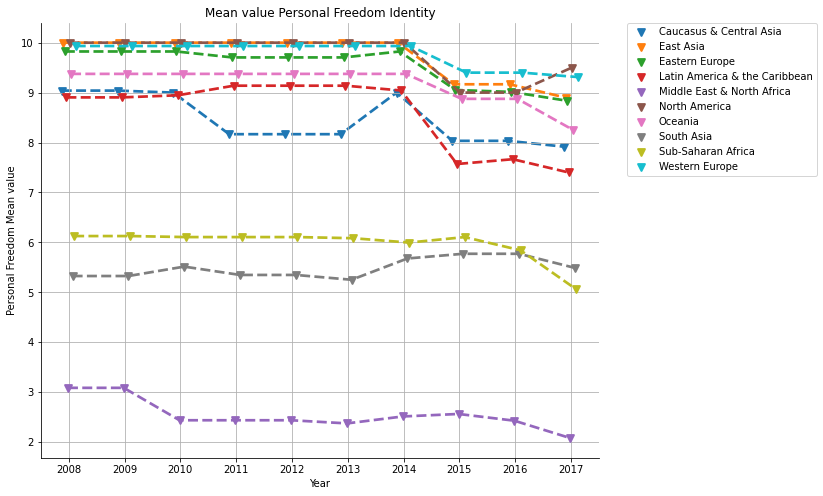

In [233]:
plt.figure(figsize=(10,8))
seaborn.pointplot(data=pf_means_by_region_year,
                  x='year', y='pf_identity',
                  hue='region', dodge=True, ci=None,
                  markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.grid(True)
plt.ylabel('Personal Freedom Mean value')
plt.xlabel('Year')
plt.title('Mean value Personal Freedom Identity')
# plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

La siguiente linea realiza las mismas operaciones que en el bloque anteriror solo que para la variable `hf_score`

In [190]:
hf_means_by_region_year = dataset[['region','year','hf_score']].groupby(['region','year']).mean()
hf_means_by_region_year.reset_index(inplace=True)
hf_means_by_region_year

,region,year,hf_score
0,Caucasus & Central Asia,2008,6.980000
1,Caucasus & Central Asia,2009,6.974000
2,Caucasus & Central Asia,2010,6.890000
3,Caucasus & Central Asia,2011,6.763333
4,Caucasus & Central Asia,2012,6.841667
...,...,...,...
95,Western Europe,2013,8.412222
96,Western Europe,2014,8.470000
97,Western Europe,2015,8.450556
98,Western Europe,2016,8.420556


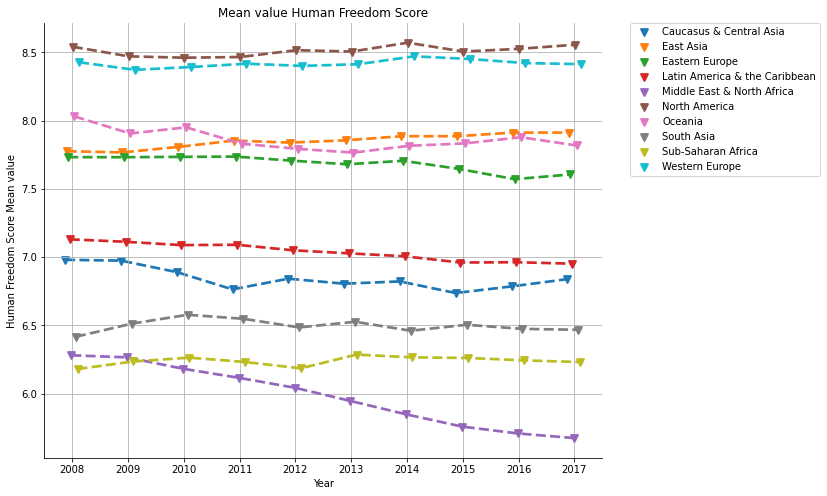

In [191]:
plt.figure(figsize=(10,8))
seaborn.pointplot(data=hf_means_by_region_year,
                  x='year', y='hf_score',
                  hue='region', dodge=True, ci=None,
                  markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.grid(True)
plt.ylabel('Human Freedom Score Mean value')
plt.xlabel('Year')
plt.title('Mean value Human Freedom Score')
# plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

#### 2.3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

En esta primera etapa tomo el subgrupo correspondiente a la region de Latinoamérica y el Caribe y realizo el mismo procedimiento de agrupacion y computo que se realizó antes.

In [225]:
lc_dataset = dataset[dataset['region']=='Latin America & the Caribbean']
pf_trend_means_by_cy = lc_dataset[['countries','year','pf_identity']].groupby(['countries','year']).mean()
pf_trend_means_by_cy.reset_index(inplace=True)
pf_trend_means_by_cy

,countries,year,pf_identity
0,Argentina,2008,10.0
1,Argentina,2009,10.0
2,Argentina,2010,10.0
3,Argentina,2011,10.0
4,Argentina,2012,10.0
...,...,...,...
255,Venezuela,2013,10.0
256,Venezuela,2014,10.0
257,Venezuela,2015,6.7
258,Venezuela,2016,6.7


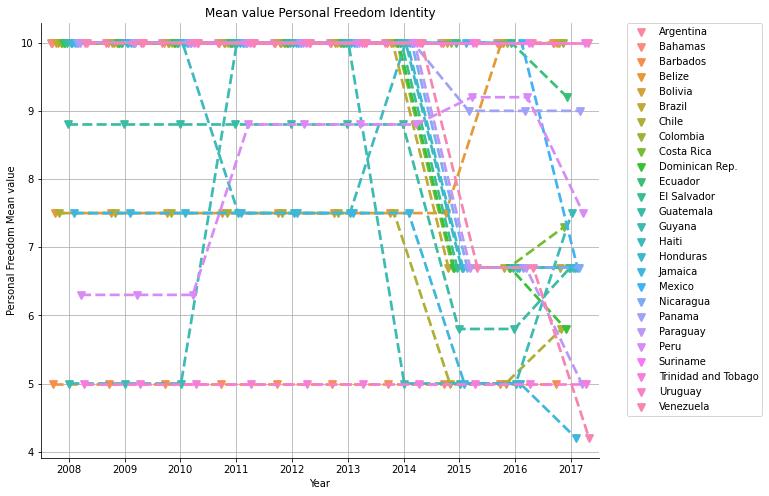

In [195]:
plt.figure(figsize=(10,8))
seaborn.pointplot(data=pf_trend_means_by_region_year,
                  x='year', y='pf_identity',
                  hue='countries', dodge=True, ci=None,
                  markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.grid(True)
plt.ylabel('Personal Freedom Mean value')
plt.xlabel('Year')
plt.title('Mean value Personal Freedom Identity')
# plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Como el grafico esta muy sobrecargado me parece que puedo limpiarlo un poco analizando solo aquellos casos que a partir del año 2014 su valor de `pf_identity` se encuentre por debajo de 7,5. El valor de umbral utilizado es empririco solo basado en la observación de figura de arriba.

Armo una lista de los paises que cumplen esa condicion.

In [223]:
countries = pf_trend_means_by_cy[(pf_trend_means_by_cy['year']>2014 )& (pf_trend_means_by_cy['pf_identity']<7.5)]
countries = countries['countries'].unique()
countries

array(['Barbados', 'Brazil', 'Chile', 'Costa Rica', 'Dominican Rep.',
       'El Salvador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
       'Jamaica', 'Mexico', 'Nicaragua', 'Paraguay',
       'Trinidad and Tobago', 'Venezuela'], dtype=object)

Amro un dataframe con los datos si el pais de origen se encuenta en la lista que se armo anteriormente.

In [227]:
pf_trend_lc = pf_trend_means_by_cy[pf_trend_means_by_cy['countries'].isin(countries)]
pf_trend_lc

,countries,year,pf_identity
20,Barbados,2008,5.0
21,Barbados,2009,5.0
22,Barbados,2010,5.0
23,Barbados,2011,5.0
24,Barbados,2012,5.0
...,...,...,...
255,Venezuela,2013,10.0
256,Venezuela,2014,10.0
257,Venezuela,2015,6.7
258,Venezuela,2016,6.7


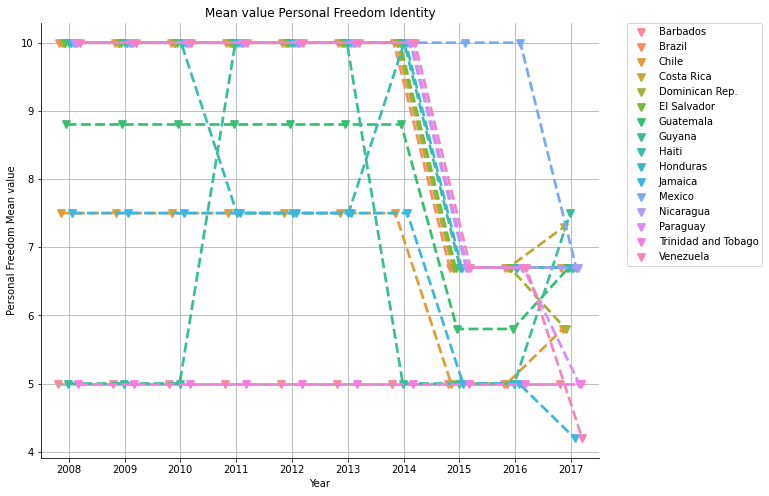

In [230]:
plt.figure(figsize=(10,8))
seaborn.pointplot(data=pf_trend_lc,
                  x='year', y='pf_identity',
                  hue='countries', dodge=True, ci=None,
                  markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.grid(True)
plt.ylabel('Personal Freedom Mean value')
plt.xlabel('Year')
plt.title('Mean value Personal Freedom Identity')
# plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Podemos decir que la tendencia que se aprecia en los paices de la region de Latam y Carig es debido a que los paices anteriormente listados presentan una caida significativa (mayor a 3.5 puntos promedio) en el indice.

#### Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

In [251]:
hf_ef_means_by_year = dataset[['year','ef_score', 'hf_score']].groupby('year').mean()
hf_ef_means_by_year.reset_index(inplace=True)
hf_ef_means_by_year

,year,ef_score,hf_score
0,2008,6.762340,7.078014
1,2009,6.767872,7.083050
2,2010,6.772484,7.035294
3,2011,6.804641,7.014575
4,2012,6.793137,6.978039
5,2013,6.794395,6.970191
6,2014,6.823333,6.949937
7,2015,6.802453,6.922264
8,2016,6.803148,6.892716
9,2017,6.799074,6.887963


No estoy seguro de estar ploteando lo que preguntan pero si es asi mi interpretacion seria que en la medida que el tiempo pasa, mantener la independencia economica en un nivel dado (`ef_score~6.8`) podria estar actuando en detrimento de la libertad personal dado que observo que la tendencia es con pendiente negativa.

(6.5, 8.0)

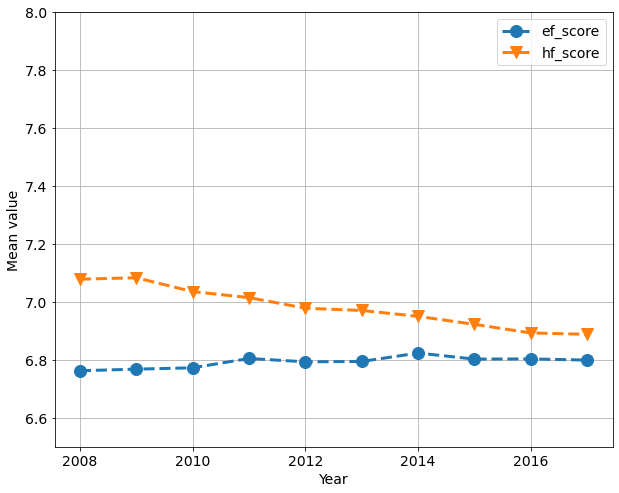

In [256]:
plt.figure(figsize=(10,8))
plt.plot(hf_ef_means_by_year.year, hf_ef_means_by_year.ef_score, '--o', label='ef_score', linewidth=3, markersize=12)
plt.plot(hf_ef_means_by_year.year, hf_ef_means_by_year.hf_score, '--v', label='hf_score', linewidth=3, markersize=12)
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('Mean value', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([6.5,8])

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


In [257]:
hist = dataset.loc[dataset['region']==region_latam_carib,['pf_identity','hf_score']]
nhist = dataset.loc[dataset['region']!=region_latam_carib,['pf_identity','hf_score']]

Cualitativamente del histograma correspondientes a Latinoamérica y el Caribe tienen un aspecto o resemplanza a una distribucion normal pero con colas un poco degeneradas. En el caso del histograma global no lo veo veo tan similar pero podria asumirlo asi.

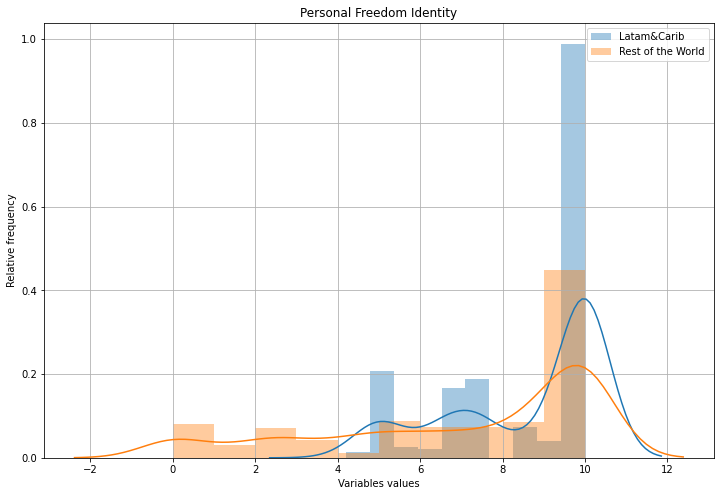

In [265]:
plt.figure(figsize=(12,8))
seaborn.distplot(hist.pf_identity, kde=True, bins=10, label='Latam&Carib')
seaborn.distplot(nhist.pf_identity, kde=True,bins=10, label='Rest of the World')
plt.title('Personal Freedom Identity')
plt.xlabel('Variables values')
plt.ylabel('Relative frequency')
plt.grid(True)
plt.legend()

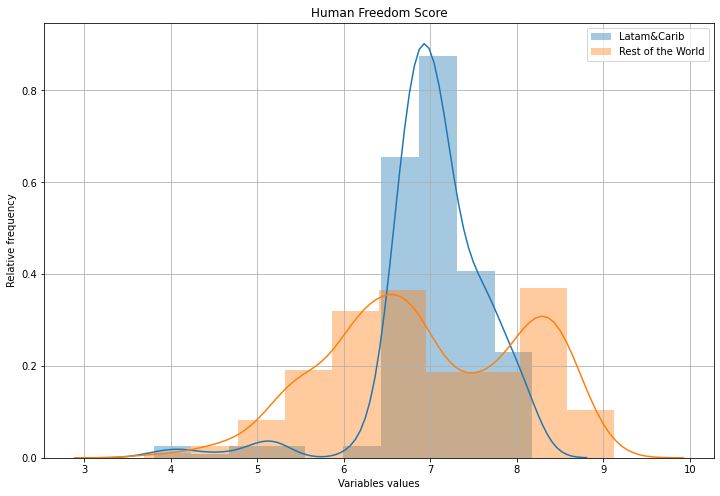

In [262]:
plt.figure(figsize=(12,8))
seaborn.distplot(hist.hf_score, kde=True, bins=10, label='Latam&Carib')
seaborn.distplot(nhist.hf_score, kde=True,bins=10, label='Rest of the World')
plt.title('Human Freedom Score')
plt.xlabel('Variables values')
plt.ylabel('Relative frequency')
plt.grid(True)
plt.legend()

Cualitativamente el histograma correspondientes a Latinoamérica y el Caribe tienen un aspecto o resemplanza a una distribucion normal pero con colas un poco degeneradas. En el caso del histograma global no lo veo parecido a una distribucion que conozca.

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?